In [ ]:
!pip install scipy scikit-posthocs

In [ ]:
import numpy as np
import scipy.stats as stats

In [ ]:
# F1 scores for each model
scores = np.array([0.67, 0.69, 0.70, 0.70, 0.72, 0.67, 0.71, 0.76, 0.85])
labels = ["CNN", "AlexNet", "DenseNet", "ResNet", "VGG-19", "Vision Transformers", "MobileVNet", "Ensemble", "Persom-wise"]

In [ ]:
# Function to perform pairwise Mann-Whitney U Test
def pairwise_mann_whitney(labels, scores):
    n = len(labels)
    p_values = np.zeros((n, n))
    print("Pairwise Mann-Whitney U Test Results:\n")

    for i in range(n):
        for j in range(i + 1, n):
            stat, p = stats.mannwhitneyu([scores[i]], [scores[j]], alternative='two-sided')
            print(f"Between {labels[i]} and {labels[j]}: U-statistic = {stat}, p-value = {p:.4f}")
            p_values[i, j] = p
            if p < 0.50:
                print(f"   Significant difference detected (p < 0.05).")
            else:
                print(f"   No significant difference detected (p >= 0.05).")

    return p_values

# Perform the pairwise tests
pairwise_results = pairwise_mann_whitney(labels, scores)

Pairwise Mann-Whitney U Test Results:

Between CNN and AlexNet: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and DenseNet: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and ResNet: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and VGG-19: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and Vision Transformers: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and MobileVNet: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and Ensemble: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between CNN and Persom-wise: U-statistic = 0.0, p-value = 1.0000
   No significant difference detected (p >= 0.05).
Between AlexNet and DenseNet: U-statistic = 0.

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu
from itertools import combinations

# F1 scores and model names
f1_scores = np.array([0.17, 0.69, 0.70, 0.70, 0.72, 0.67, 0.71, 0.76, 0.85])
models = ["CNN", "AlexNet", "DenseNet", "ResNet", "VGG-19", "Vision Transformers", "MobileVNet", "Ensemble", "Person-wise"]

# Generate all model pairs
model_pairs = list(combinations(range(len(models)), 2))

# Original significance level
alpha = 0.05

# Adjusted significance level for Bonferroni correction
alpha_corrected = alpha / len(model_pairs)

# Store results
results = []

# Perform the Mann-Whitney U test on each pair
for i, j in model_pairs:
    stat, p_value = mannwhitneyu([f1_scores[i]], [f1_scores[j]], alternative='two-sided')
    results.append((models[i], models[j], stat, p_value, p_value < alpha_corrected))

# Print the results
for result in results:
    print("Comparison between {} and {}: U-statistic = {:.2f}, p-value = {:.4f}, Significantly Different: {}".format(*result))



Comparison between CNN and AlexNet: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and DenseNet: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and ResNet: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and VGG-19: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and Vision Transformers: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and MobileVNet: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and Ensemble: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between CNN and Person-wise: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between AlexNet and DenseNet: U-statistic = 0.00, p-value = 1.0000, Significantly Different: False
Comparison between AlexNet and 

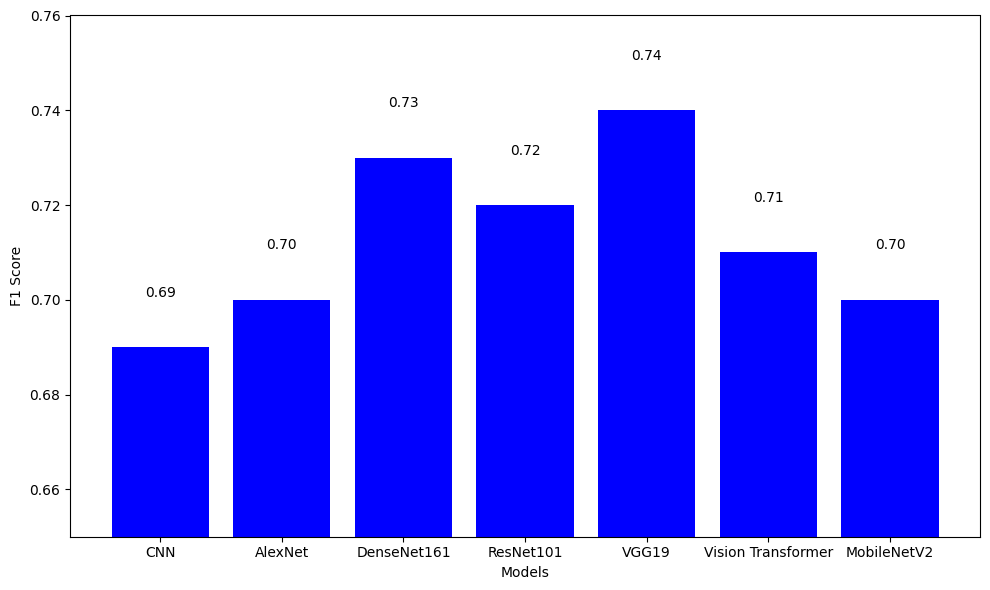

In [ ]:
import matplotlib.pyplot as plt

# F1 scores and model labels
scores = [0.69, 0.70, 0.73, 0.72, 0.74, 0.71, 0.70]
labels = ["CNN", "AlexNet", "DenseNet161", "ResNet101", "VGG19", "Vision Transformer", "MobileNetV2"]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color='blue')
plt.xlabel('Models')
plt.ylabel('F1 Score')
#plt.title('Comparison of F1 Scores Across Different Models')
plt.ylim(0.65, 0.76)  # Adjust as necessary based on your score range
for i in range(len(scores)):
    plt.text(i, scores[i] + 0.01, f'{scores[i]:.2f}', ha = 'center', va = 'bottom')

# Show the plot
plt.tight_layout()
plt.show()


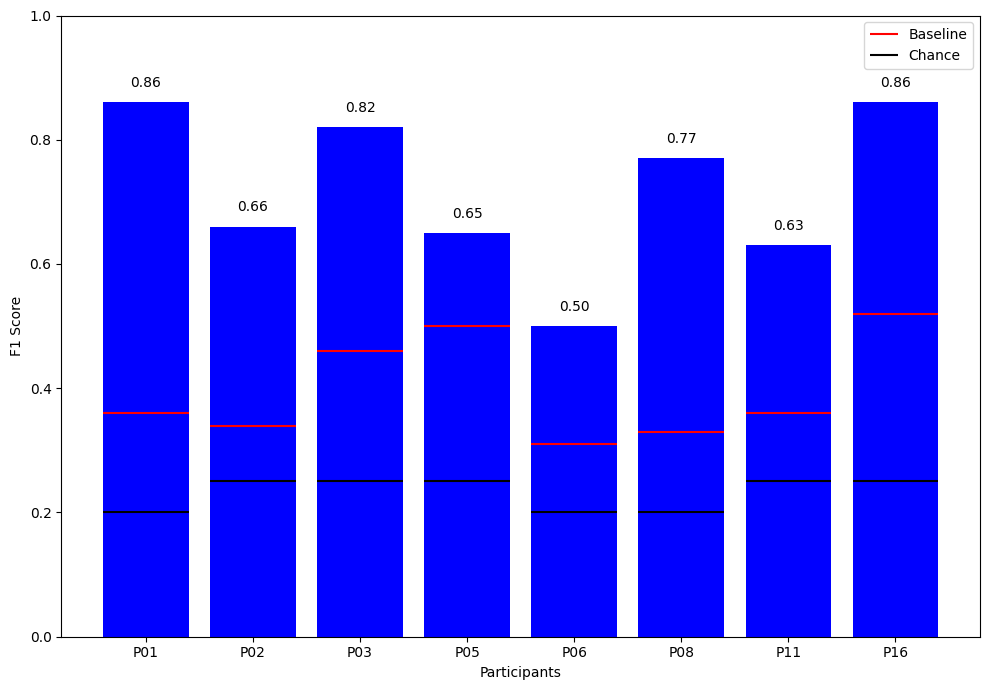

In [ ]:
import matplotlib.pyplot as plt

# Participant IDs
participants = ['P01', 'P02', 'P03', 'P05', 'P06', 'P08', 'P11', 'P16']

# F1 scores
scores = [0.86, 0.66, 0.82, 0.65, 0.50, 0.77, 0.63, 0.86]

# Baseline values
baseline = [0.36, 0.34, 0.46, 0.50, 0.31, 0.33, 0.36, 0.52]

# Chance values
chance = [0.20, 0.25, 0.25, 0.25, 0.20, 0.20, 0.25, 0.25]

# Creating the bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(participants, scores, color='blue')

# Adding horizontal lines for baseline and chance
for i, bar in enumerate(bars):
    plt.hlines(baseline[i], bar.get_x(), bar.get_x() + bar.get_width(), colors='red', linestyles='solid', label='Baseline' if i==0 else "")
    plt.hlines(chance[i], bar.get_x(), bar.get_x() + bar.get_width(), colors='black', linestyles='solid', label='Chance' if i==0 else "")
    plt.text(bar.get_x() + bar.get_width() / 2, scores[i] + 0.02, f'{scores[i]:.2f}', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Participants')
plt.ylabel('F1 Score')
# plt.title('F1 Scores with Baseline and Chance Levels')
plt.ylim(0, 1)  # Adjust the y-axis limits to better suit your range of scores

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



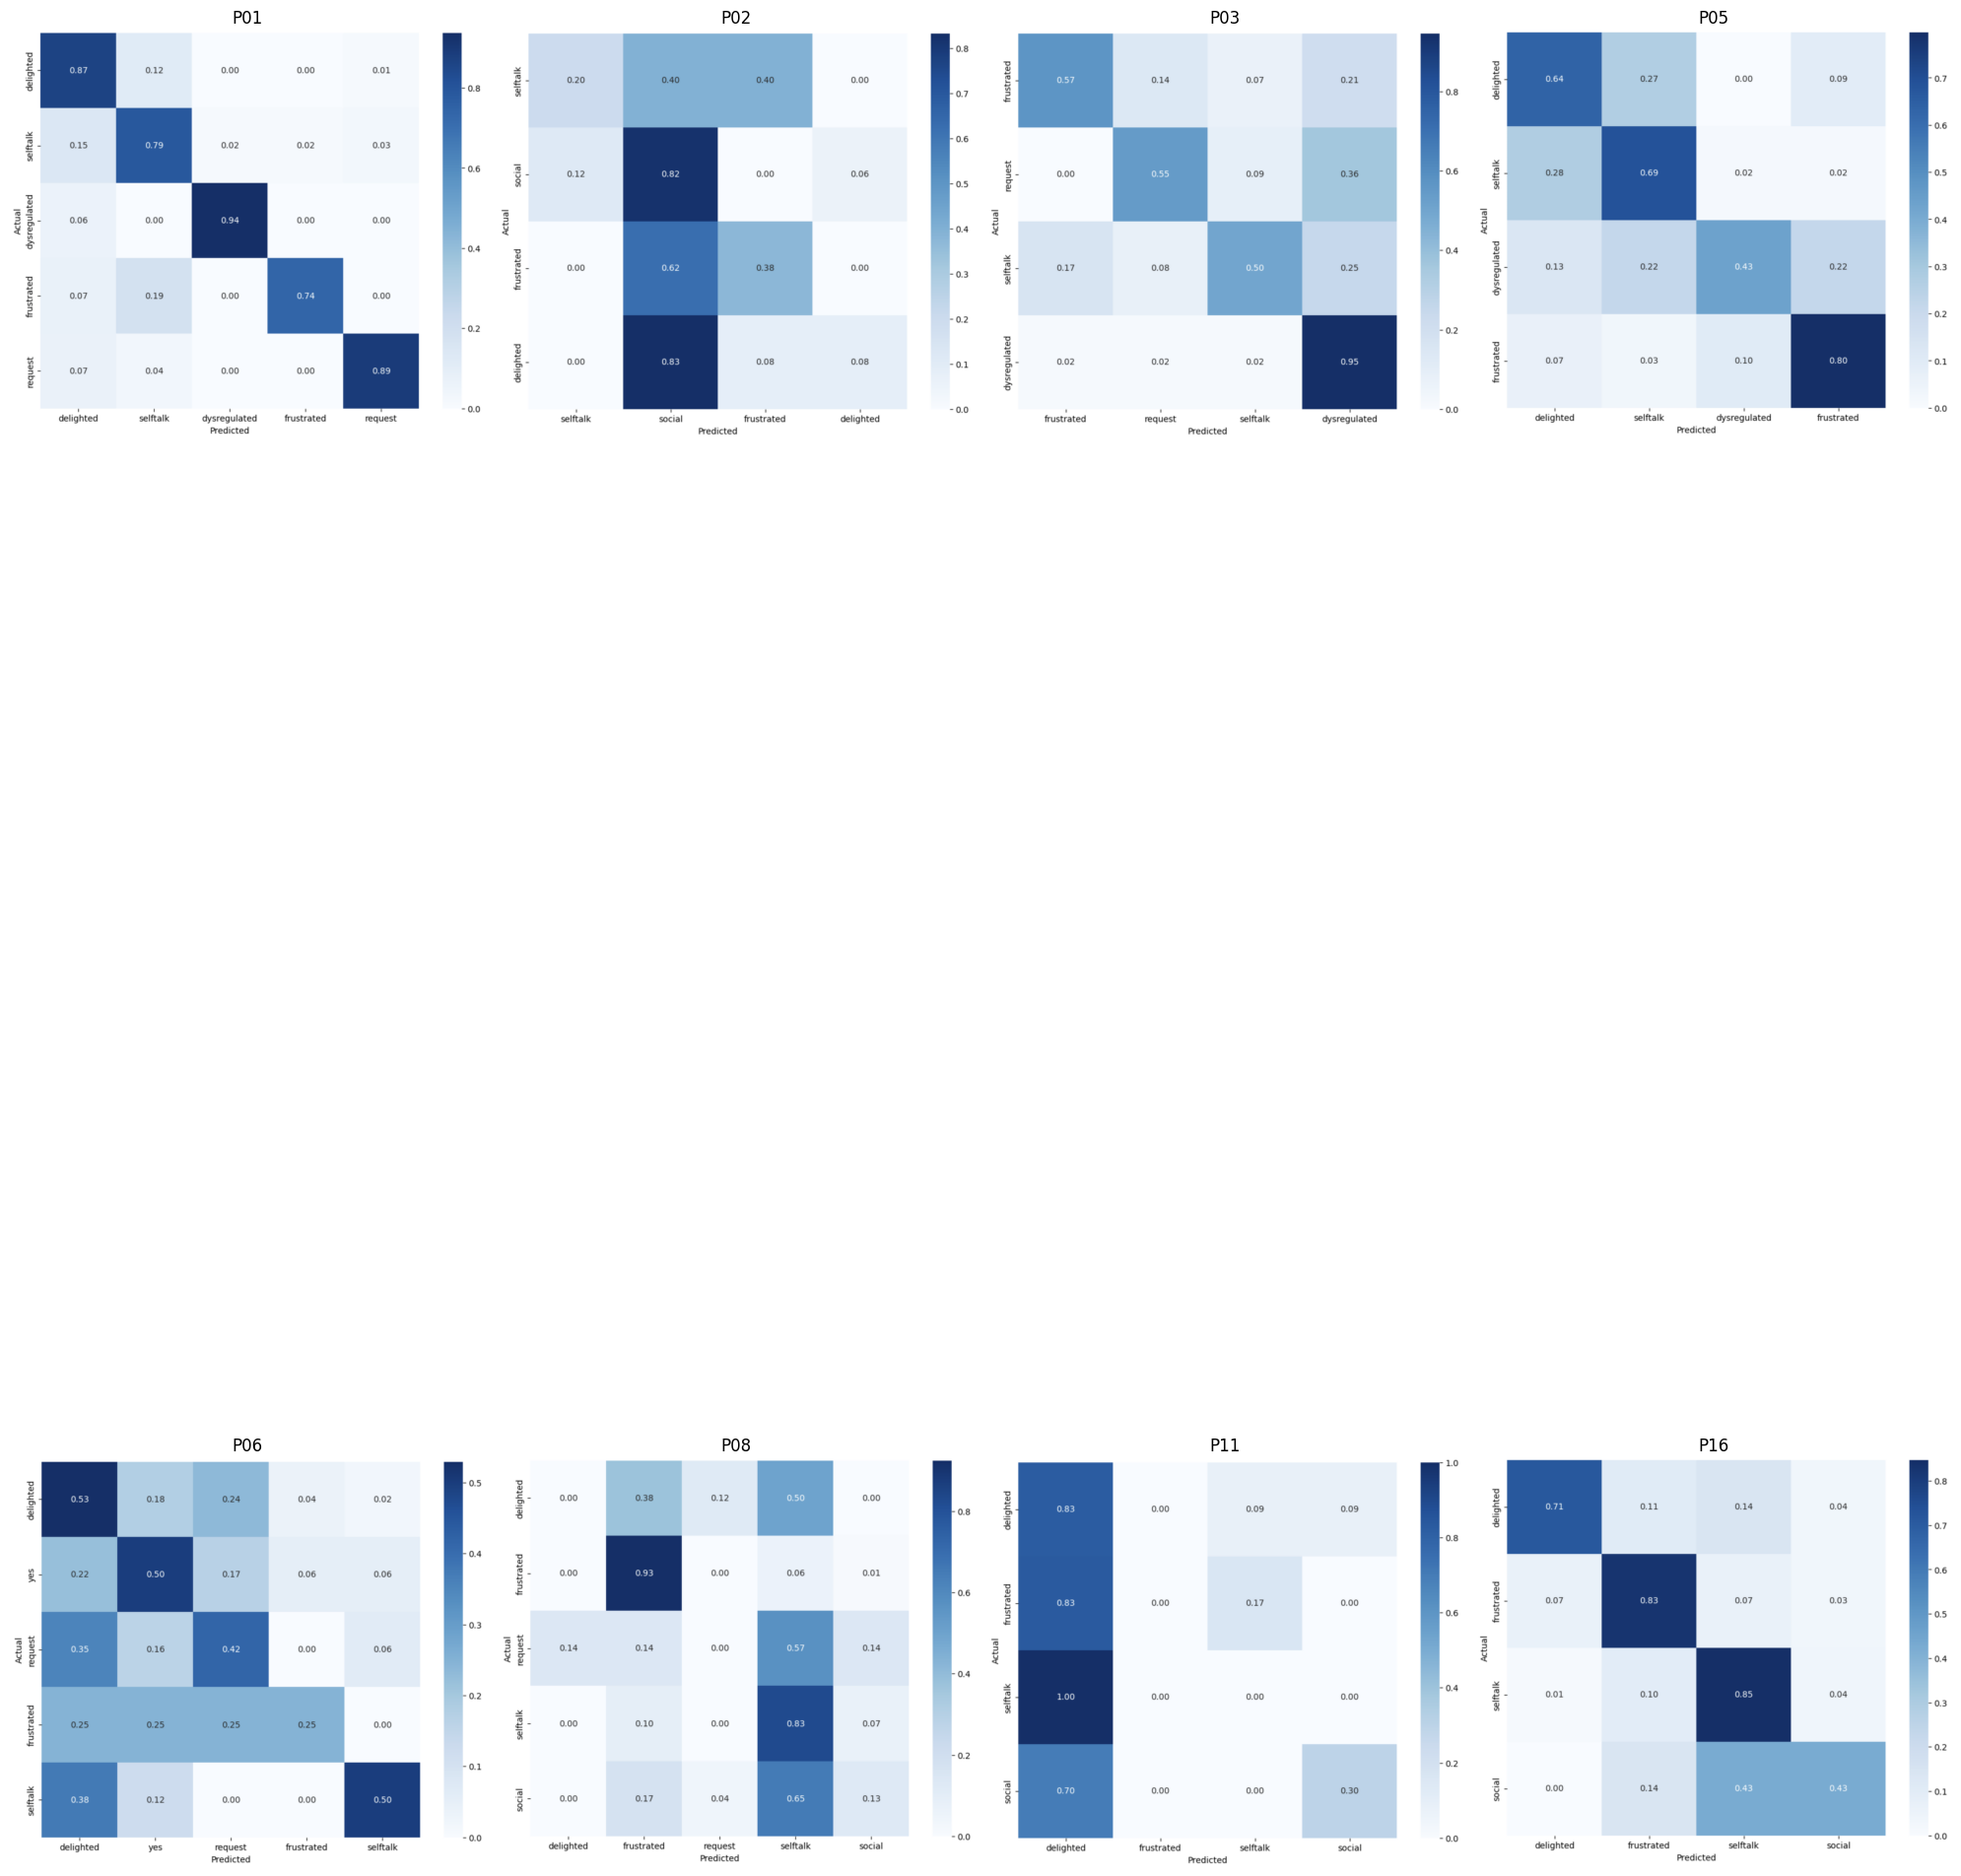

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images and corresponding labels
image_paths = ['/content/P01.png', '/content/P02.png', '/content/P03.png', '/content/P05.png',
               '/content/P06.png', '/content/P08.png', '/content/P11.png', '/content/P16.png']
labels = ['P01', 'P02', 'P03', 'P05',
          'P06', 'P08', 'P11', 'P16']

# Create a figure and an axes array with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 40))  # Adjust figsize accordingly
#plt.subplots_adjust(hspace=0.001)
# Iterate over the images, axes, and labels to place each image in its subplot
for ax, img_path, label in zip(axes.flatten(), image_paths, labels):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)  # Set the title for each subplot
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()

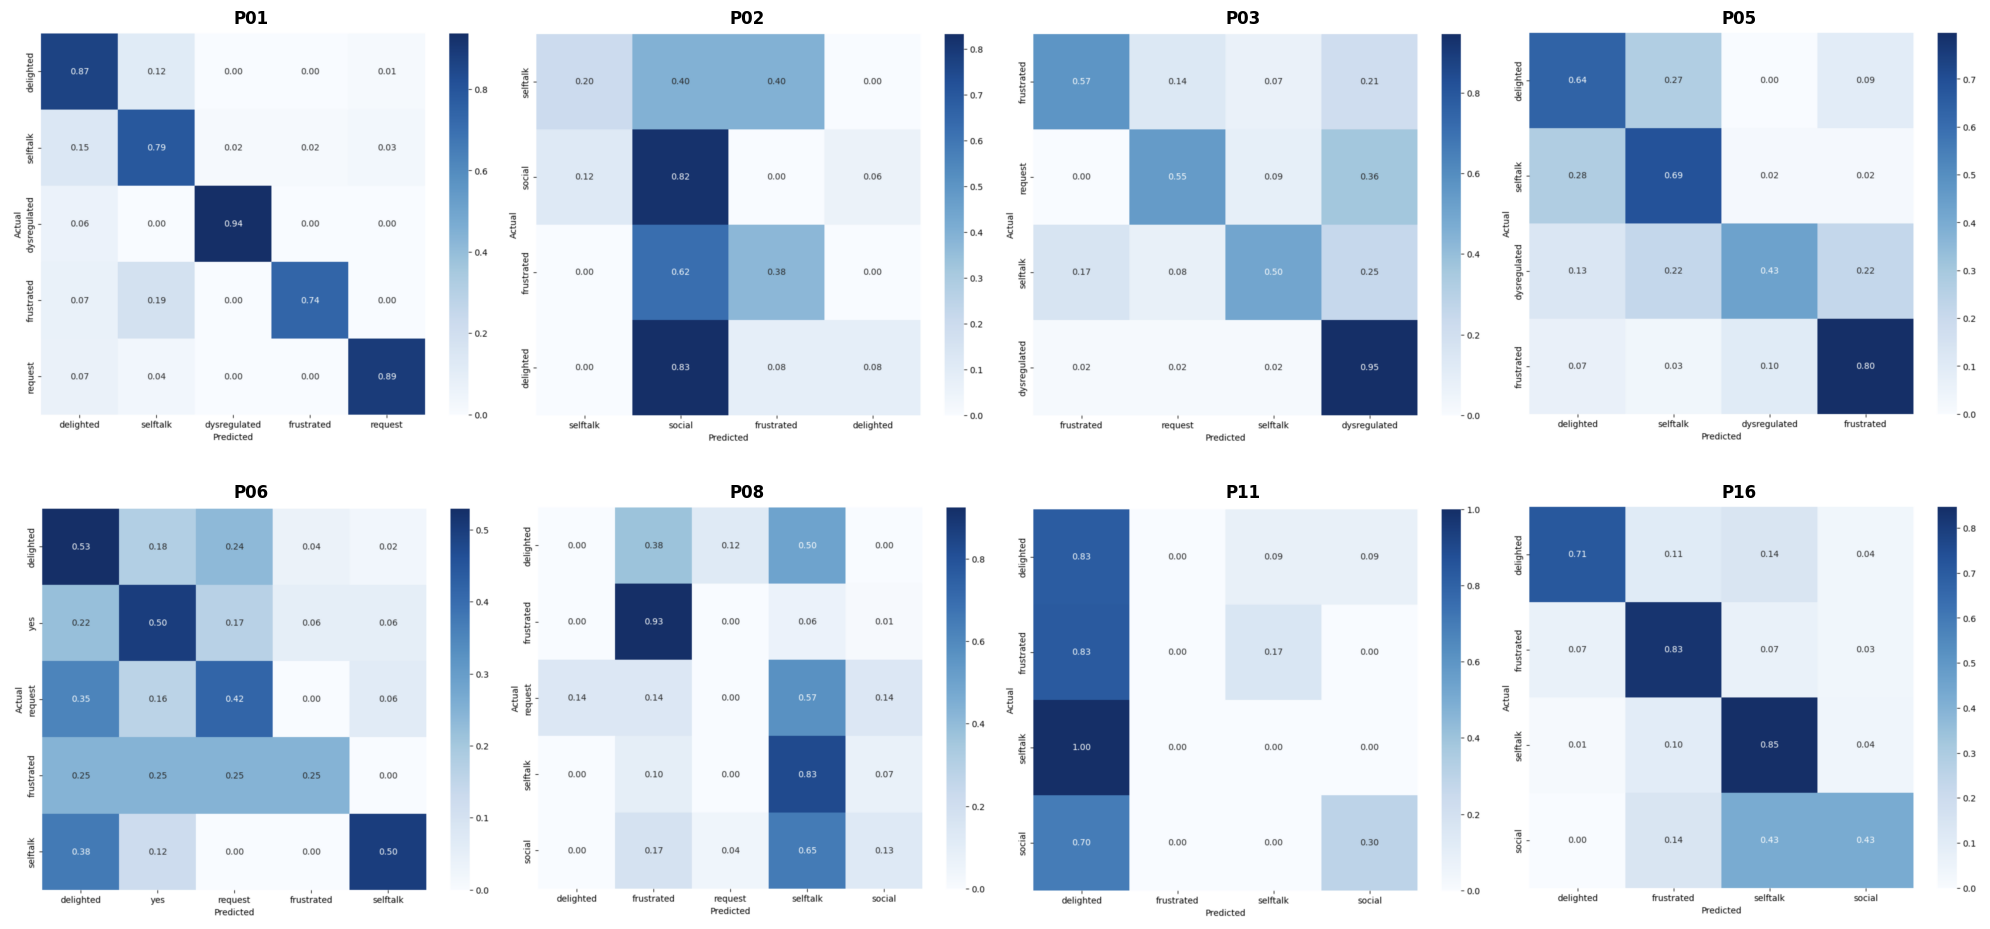

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your images and corresponding labels
image_paths = ['/content/P01.png', '/content/P02.png', '/content/P03.png', '/content/P05.png',
               '/content/P06.png', '/content/P08.png', '/content/P11.png', '/content/P16.png']
labels = ['P01', 'P02', 'P03', 'P05',
          'P06', 'P08', 'P11', 'P16']

# Create a figure and an axes array
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Iterate over the images, axes, and labels to place each image in its subplot
for ax, img_path, label in zip(axes.flatten(), image_paths, labels):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label, fontweight='bold')  # Set the title for each subplot
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()